# LSTM

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [20]:
# Load the dataset
df = pd.read_csv('C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv')  

# Let's assume 'Close' is the target variable for prediction
df = df[['Close']]

# Normalization of data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Preparing the dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])  # Assuming the first column is the target
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)

In [21]:
# Splitting data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshaping for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [22]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\dugga\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 6.0453e-05 - val_loss: 1.1347e-05
Epoch 2/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.5608e-06 - val_loss: 2.8738e-05
Epoch 3/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1734e-06 - val_loss: 2.3770e-05
Epoch 4/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6332e-06 - val_loss: 1.3010e-05
Epoch 5/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.8270e-06 - val_loss: 1.2154e-05
Epoch 6/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5056e-06 - val_loss: 1.0426e-05
Epoch 7/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.7521e-06 - val_loss: 2.1508e-05
Epoch 8/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.1485e-06 - val_loss: 1.5583e-04
Epoch 9/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.0825e-06 - val_loss: 3.0259e-05
Epoch 10/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5184e-06 - val_loss: 8.6506e-06
Epoch 11/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step -

Test Loss: 0.0019608268048614264
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RMSE: 8.057451044678844
MAE: 4.81725783227731
MAPE: 5.946652242003822


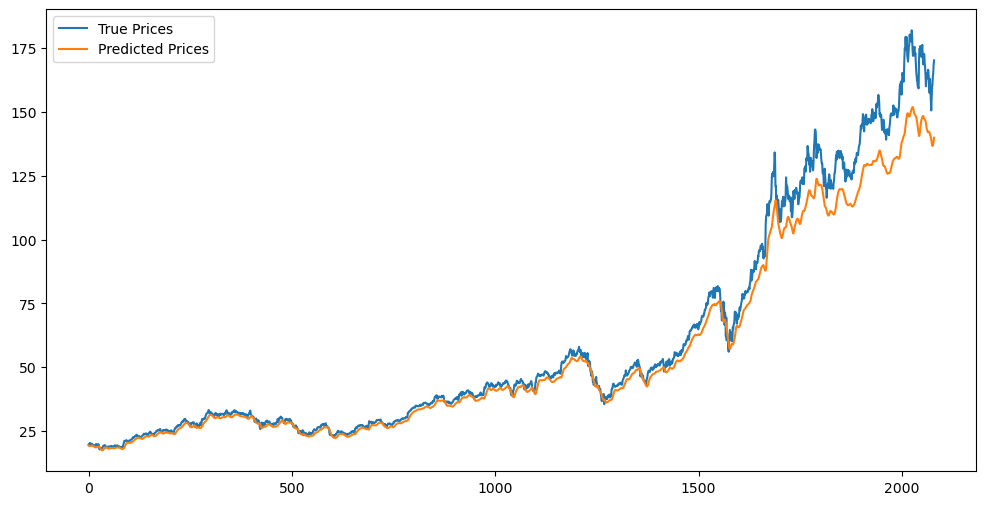

In [24]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()